In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 魔术方法表示在ipynb中显示图
%matplotlib inline

In [2]:
path = '../dataset/train.csv'

In [3]:
titanic = pd.read_csv(path)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 将PassengerId设置为索引

In [4]:
titanic.set_index('PassengerId',inplace = True)

In [5]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#  绘制一个展示男女乘客比例的扇形图

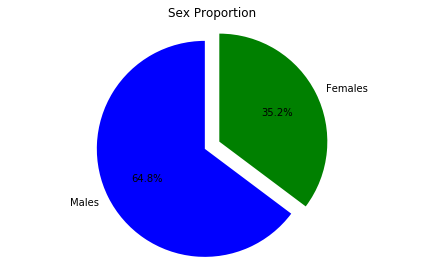

In [6]:
# 分别统计男女数量
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

# 放入列表 proportions 中
proportions = [males, females]

# 建立一个 pie chart
plt.pie(
    # 使用 proportions
    proportions,
    
    # 设置 label 名称
    labels = ['Males', 'Females'],

    shadow = False,
    
    # 设置颜色
    colors = ['blue','green'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # 起始角度
    startangle = 90,
    
    # 精度
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# 设置标题
plt.title("Sex Proportion")

# View the plot
plt.tight_layout()
plt.show()

# 绘制一个展示船票Fare, 与乘客年龄和性别的散点图

(-5, 85)

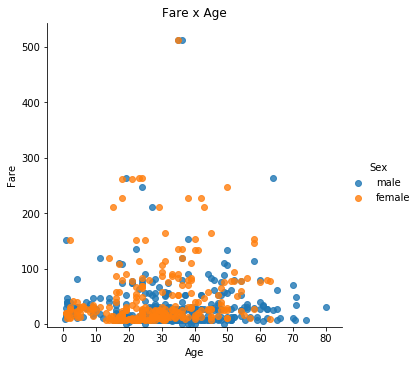

In [7]:
# 使用 sns 的lmplot 画散点图
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)

# 设置标题
lm.set(title = 'Fare x Age')

# get the axes object and tweak it
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

# 有多少人生还?

In [8]:
titanic.Survived.sum()

342

# 绘制一个展示船票价格的直方图

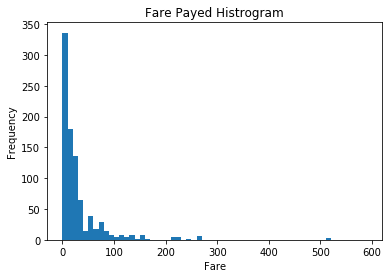

In [9]:
# sort the values from the top to the least value and slice the first 5 items
df = titanic.Fare.sort_values(ascending = False)

# create bins interval using numpy
binsVal = np.arange(0,600,10)

# create the plot
plt.hist(df, bins = binsVal)

# Set the title and labels
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')

# show the plot
plt.show()